In [283]:
'''
   Owen Kelley
   4/15/2024
   Dataset = Age Prediction Using Gene Expression - Kaggle & Zendo
   Kaggle = https://www.kaggle.com/datasets/thedevastator/age-prediction-for-individuals-using-multi-omic/data
   Zendo  = https://zenodo.org/records/2545213

   Citation: anup. (2019). Age prediction using machine learning. https://doi.org/10.5281/zenodo.2545213
   
   This Code predicts age based on gene expression using 
   a linear ML algorithm to predict age based on the expression of genes.
   
   Current highest MAE is:   3.470532
'''

'\n   Owen Kelley\n   4/15/2024\n   Dataset = Age Prediction Using Gene Expression - Kaggle & Zendo\n   Kaggle = https://www.kaggle.com/datasets/thedevastator/age-prediction-for-individuals-using-multi-omic/data\n   Zendo  = https://zenodo.org/records/2545213\n\n   Citation: anup. (2019). Age prediction using machine learning. https://doi.org/10.5281/zenodo.2545213\n   \n   This Code predicts age based on gene expression using \n   a linear ML algorithm to predict age based on the expression of genes.\n   \n   Current highest MAE is:   3.470532\n'

In [284]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as ks
from keras import layers
from sklearn.model_selection import train_test_split
from typing import Literal
import matplotlib.pyplot as plt
import seaborn as sns

data_filepath = "./geneAgeData.csv"

prelim_data = pd.read_csv(data_filepath)

pythonFig1 = prelim_data

features = ["RPA2_3", "ZYG11A_4", "F5_2", "HOXC4_1", "NKIRAS2_2", 
            "MEIS1_1", "SAMD10_2", "GRM2_9", "TRIM59_5", "LDB2_3",
            "ELOVL2_6", "DDO_1", "KLF14_2"]

x = prelim_data[features]
y = prelim_data["Age"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

tf.convert_to_tensor(x_train)


<tf.Tensor: shape=(83, 13), dtype=float64, numpy=
array([[60.55, 17.9 , 43.5 , ..., 53.81, 48.77,  2.67],
       [58.3 , 15.1 , 42.13, ..., 48.17, 56.52,  1.4 ],
       [60.86, 20.08, 37.9 , ..., 52.4 , 39.61,  1.37],
       ...,
       [61.3 , 37.09, 30.77, ..., 69.32, 64.16,  1.73],
       [66.7 , 17.34, 31.52, ..., 61.87, 32.23,  2.02],
       [66.44, 20.96, 34.99, ..., 67.48, 36.06,  4.22]])>

In [285]:
test_results = {}

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1) # units = 1
])

linear_model.predict(x_train[:13])

#################################
linear_model.layers[1].kernel 
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #0.1
    loss='mean_absolute_error')
#################################

history = linear_model.fit(
    x_train,
    y_train,
    # Originally 350 with 0.1 learning rate
    # Significantly increases learning time
    epochs=3500, 
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

final_linear_history = history
test_results['linear_model'] = linear_model.evaluate(
    x_test, y_test, verbose=0)


1/1 [==============================] - 0s 68ms/step


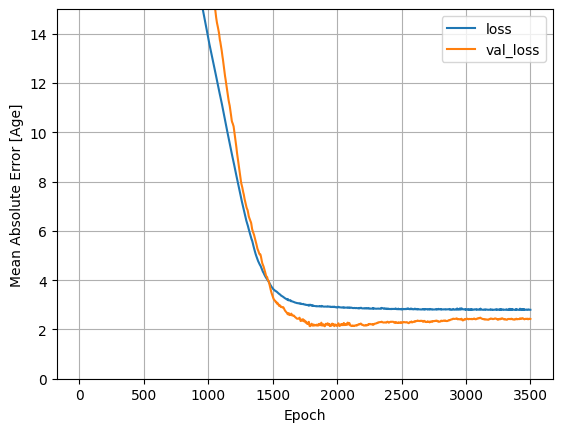

In [286]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 15])
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error [Age]')
  plt.legend()
  plt.grid(True)

plot_loss(final_linear_history)

test_results['linear_model'] = linear_model.evaluate(
    x_test, y_test, verbose=0)


In [287]:
pd.DataFrame(test_results, index=['Mean absolute error [Age]']).T


,Mean absolute error [Age]
linear_model,3.518077


In [288]:
# 3.470532
#linear_model.save_weights("./savedWeights")

#model.load_weights("./savedWeights")